In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

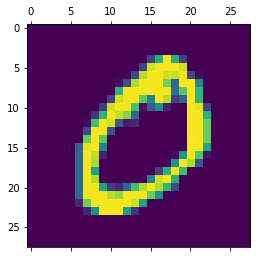

In [9]:
plt.matshow(X_train[1])

In [10]:
y_train[1]

0

In [13]:
X_train.shape

(60000, 28, 28)

In [19]:
# scale the data. If not, accuracy is low
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [21]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [22]:
#create a simple neural network
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', #categories 1,2,3... sparse because output is integer
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4926 - accuracy: 0.8751
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3067 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2858 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2749 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2679 - accuracy: 0.9264


In [23]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 826us/step - loss: 0.2670 - accuracy: 0.9263


[0.26701512932777405, 0.9262999892234802]

In [29]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.1777225e-05, 9.3383988e-11, 5.3983360e-05, 1.0040849e-02,
       1.0657020e-06, 1.0666619e-04, 1.1863717e-09, 7.6942843e-01,
       7.6934943e-05, 8.0394745e-04], dtype=float32)

In [32]:
np.argmax(y_predicted[0])

7

In [33]:
y_test[0]

7

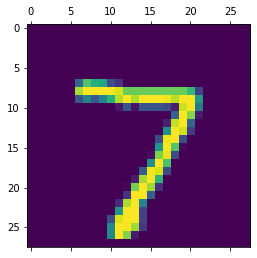

In [34]:
plt.matshow(X_test[0])

In [35]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [36]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [37]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    1,    0,    3,    6,    2,    1,    0],
       [   0, 1107,    4,    2,    0,    1,    4,    2,   15,    0],
       [   9,    4,  934,   16,    8,    3,   12,    8,   35,    3],
       [   2,    0,   23,  922,    0,   22,    2,   10,   21,    8],
       [   2,    1,    3,    1,  918,    0,   11,    4,    9,   33],
       [  12,    2,    3,   37,    9,  768,   14,    6,   35,    6],
       [  10,    3,    8,    1,    7,    9,  914,    2,    4,    0],
       [   2,    6,   25,    5,    8,    0,    0,  943,    1,   38],
       [   8,    4,    8,   20,    9,   22,   10,   10,  875,    8],
       [  11,    6,    1,   10,   29,    7,    0,   20,    8,  917]])>

Text(69.0, 0.5, 'Truth')

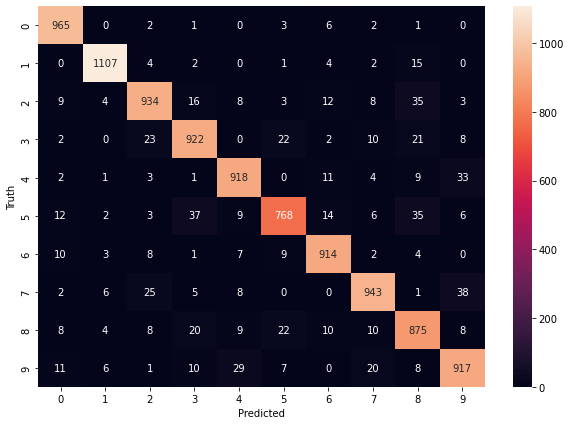

In [42]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
# add a hidden layer (hidden layers usually improve the accuracy)
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', #categories 1,2,3... sparse because output is integer
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2988 - accuracy: 0.9162
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1359 - accuracy: 0.9609
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0973 - accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0625 - accuracy: 0.9807


In [44]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0844 - accuracy: 0.9753


[0.08442746847867966, 0.9753000140190125]

Text(69.0, 0.5, 'Truth')

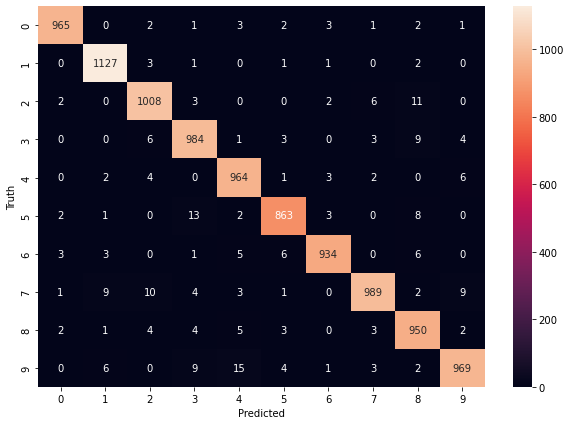

In [46]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
#flattening included in the model layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', #categories 1,2,3... sparse because output is integer
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2841 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1337 - accuracy: 0.9605: 0s - loss: 0.1341 - accuracy: 0.96
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0958 - accuracy: 0.9718
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0746 - accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0597 - accuracy: 0.9813
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0483 - accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0411 - accuracy: 0.9876
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0340 - accuracy: 0.9897: 0s -
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9914
Epoch 10/10
1875/1875 [=================